In [4]:
#Program to generate the Bell state psi+
from qiskit import *

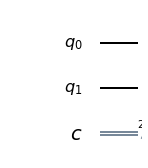

In [5]:
qc=QuantumCircuit(2,2) #quantum circuit with 2 qubits and 2 bits
qc.draw(output='mpl')

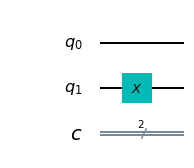

In [6]:
#Process is similar to the creation of phi+ with the additional step of adding an X gate on the second qubit as shown.
qc.x(1) #This takes the 2nd qubit from ket(0) to ket(1), state of two qubits is ket(01)
qc.draw(output='mpl')
#After this, the  process is exactly the same as that of generating phi+

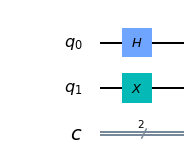

In [7]:
#Applying a hadamard gate to the first qubit
qc.h(0)  #This takes the first qubit from ket(0) to ket(+)
qc.draw(output='mpl')

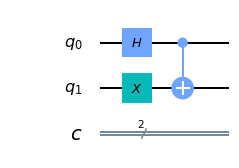

In [8]:
#Applying a cnot gate with q0 as the control bit and q1 as the target bit
qc.cx(0,1) #This gives phi+
qc.draw(output='mpl')

In [9]:
#Simulating the statevector of the two qubits
backend_req=Aer.get_backend('statevector_simulator') #setting up the required backend

In [10]:
#Executing the circuit
job_req=execute(qc,backend_req)

In [11]:
#Extracting the results
req_statevector=job_req.result().get_statevector()
for amplitude in req_statevector:
    print(amplitude)
#type(req_statevector)

0j
(0.7071067811865476+0j)
(0.7071067811865476+0j)
0j


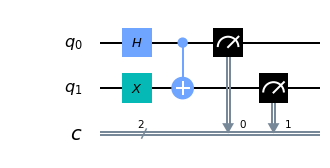

In [12]:
#Performing a measurement on both the qubits
qc.measure(0,0)
qc.measure(1,1)
qc.draw(output='mpl')

In [15]:
#Executing the circuit on a simulated quantum device
backend_sim_qd=Aer.get_backend('qasm_simulator')
job_sim_qd=execute(qc,backend_sim_qd,shots=8000)

In [16]:
#Extracting the results
hist=job_sim_qd.result().get_counts()
print(hist)

{'10': 4041, '01': 3959}


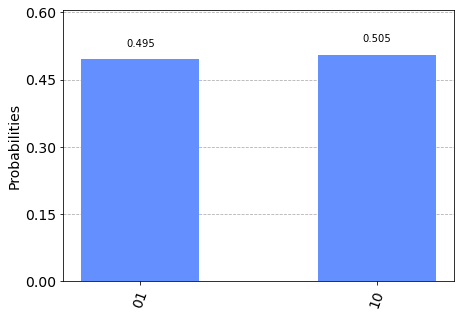

In [17]:
#Plotting the results
from qiskit.visualization import plot_histogram
plot_histogram(hist)